In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [55]:
df_hotel = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Wrangling

In [56]:
df_hotel = df_hotel.drop(columns=['company','reservation_status_date'],axis=1)
df_hotel['agent'] = df_hotel['agent'].fillna(df_hotel['agent'].mean())
df_hotel = df_hotel.dropna(axis=0)

In [57]:
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,86.693382,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out


## EDA

All categorical variables are converted to numerical variables

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df_hotel[['reservation_status','customer_type','market_segment','distribution_channel','reserved_room_type','assigned_room_type','arrival_date_month','meal','hotel','country','deposit_type']]
df_hotel[['reservation_status','customer_type','market_segment','distribution_channel','reserved_room_type','assigned_room_type','arrival_date_month','meal','hotel','country','deposit_type']] = df1.apply(lambda x: le.fit_transform(x))
df_hotel 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,86.693382,0,2,0.00,0,0,1
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,86.693382,0,2,0.00,0,0,1
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,86.693382,0,2,75.00,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,304.000000,0,2,75.00,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,240.000000,0,2,98.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,0,394.000000,0,2,96.14,0,0,1
119386,0,0,102,2017,1,35,31,2,5,3,...,4,0,0,9.000000,0,2,225.43,0,2,1
119387,0,0,34,2017,1,35,31,2,5,2,...,3,0,0,9.000000,0,2,157.71,0,4,1
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,0,89.000000,0,2,104.40,0,0,1


In [59]:
df_hotel.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
agent                             

Determine Correlation for all the columns with one another

In [81]:
import seaborn as sns
df_hotel.corr().round(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.0,-0.1,-0.1,-0.0,-0.0,-0.0,0.0,0.2,0.2,0.0,...,0.3,0.1,-0.2,0.7,-0.1,-0.0,-0.1,0.2,0.0,0.1
is_canceled,-0.1,1.0,0.3,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.1,...,-0.2,-0.1,0.5,-0.1,0.1,-0.1,0.0,-0.2,-0.2,-0.9
lead_time,-0.1,0.3,1.0,0.0,0.1,0.1,0.0,0.1,0.2,0.1,...,-0.2,0.0,0.4,-0.1,0.2,0.1,-0.1,-0.1,-0.1,-0.3
arrival_date_year,-0.0,0.0,0.0,1.0,-0.3,-0.5,-0.0,0.0,0.0,0.0,...,0.0,0.0,-0.1,0.1,-0.1,-0.0,0.2,-0.0,0.1,-0.0
arrival_date_month,-0.0,-0.0,0.1,-0.3,1.0,0.3,-0.0,-0.0,-0.0,-0.1,...,-0.0,-0.0,0.1,-0.0,0.0,0.0,-0.1,-0.0,-0.1,-0.0
arrival_date_week_number,-0.0,0.0,0.1,-0.5,0.3,1.0,0.1,0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0,0.0,-0.0
arrival_date_day_of_month,0.0,-0.0,0.0,-0.0,-0.0,0.1,1.0,-0.0,-0.0,-0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stays_in_weekend_nights,0.2,-0.0,0.1,0.0,-0.0,0.0,-0.0,1.0,0.5,0.1,...,0.1,0.1,-0.1,0.1,-0.1,-0.1,0.0,-0.0,0.1,0.0
stays_in_week_nights,0.2,0.0,0.2,0.0,-0.0,0.0,-0.0,0.5,1.0,0.1,...,0.1,0.1,-0.1,0.2,-0.0,-0.1,0.1,-0.0,0.1,-0.0
adults,0.0,0.1,0.1,0.0,-0.1,0.0,-0.0,0.1,0.1,1.0,...,0.1,-0.1,-0.0,-0.0,-0.0,-0.1,0.2,0.0,0.1,-0.1


Based on the above table, I have chosed Reservation_status as my target variable and __is_canceled__ and __deposit type__ as the independent variables.

Relation between Canceled and Reservation status

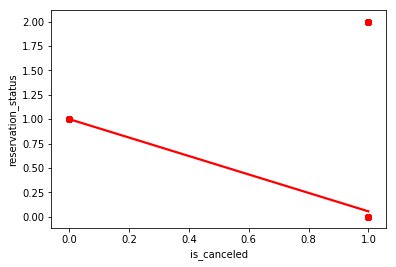

In [83]:

sns.regplot(x=df_hotel['is_canceled'],y=df_hotel['reservation_status'],data=df_hotel,color='r',label='Relation between Canceled and Reservation status')


There is a strong negative correlation between is_canceled and reservation status based on the regression plot

Relation between Deposit Type and Reservation status

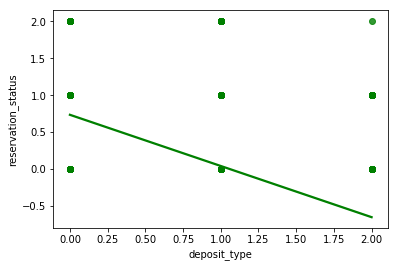

In [78]:
sns.regplot(x=df_hotel['deposit_type'],y=df_hotel['reservation_status'],data=df_hotel,color='g',label='Relation between Deposit Type and Reservation status')


There is a moderate negative correlation between deposit type and reservation status based on the regression plot

## Model Development

In [87]:
from sklearn.model_selection import train_test_split
x = df_hotel[['is_canceled','deposit_type']]
y = df_hotel['reservation_status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=4)

In [88]:
print(x_train.shape,',',x_test.shape)

(35669, 2) , (83229, 2)


Since the chosen independent variables are categorical. We can use a classification model like decision tree.

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)


## Model Evaluation

In [94]:
yhat = dtree.predict(x_test)
yhat

array([0, 1, 1, ..., 0, 0, 0])

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     30138
           1       1.00      1.00      1.00     52257
           2       0.00      0.00      0.00       834

    accuracy                           0.99     83229
   macro avg       0.66      0.67      0.66     83229
weighted avg       0.98      0.99      0.99     83229



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,yhat))

0.9899794542767545


Based on the evaluation metrics, this model provides the highest accuracy

## Data Visualisation

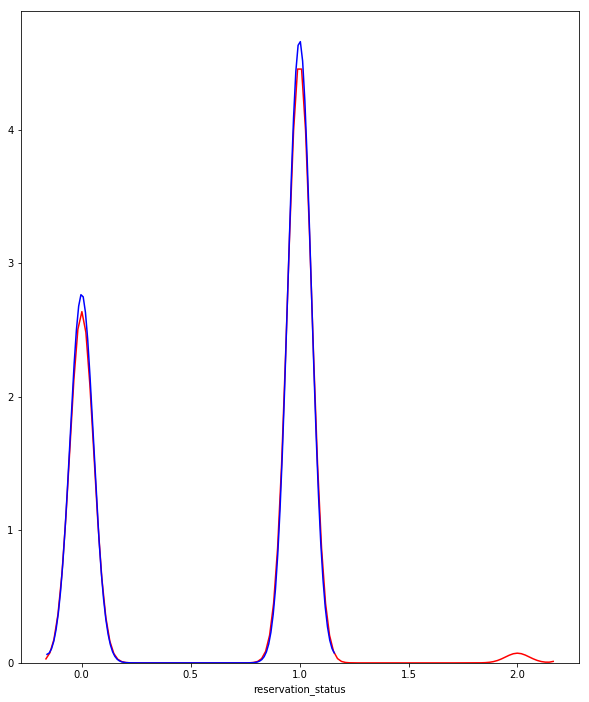

In [104]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,12))
ax1 = sns.distplot(y_test,color='r',hist=False)
ax2 = sns.distplot(yhat,color='b',ax=ax1,hist=False)
plt.show()

Based on the distribution plot, we could see that each values 'booked' and 'not booked' values are matching exactly with the untrained test values